<a href="https://colab.research.google.com/github/Roy-Subhankar/Telecom-Churn-Analysis/blob/main/Subhankar_Roy_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load and read the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/EDA Capstone Project/Telecom Churn.csv')

In [4]:
#see how data look like
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


##Basic Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
# Statistical Analysis
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

we see that the data consists of cleaned customer activity data.

#My primary aim is to find why customer canceled the subscription
##After doing Basic Analysis I understand that 'Churn' is my Target variable.
###If 'Churn' is True that's mean customer canceled the subscription otherwise customer not canceled the subscription

###let see how many customer canceled the subscription

In [8]:
df['Churn'].value_counts().rename('Total no.').reset_index()

,index,Total no.
0,False,2850
1,True,483


In [9]:
Total_Churn_percentage=(df['Churn'].value_counts(normalize=True)).mul(100).round(2).rename('percentage').reset_index()
Total_Churn_percentage

,index,percentage
0,False,85.51
1,True,14.49


Text(0, 0.5, 'percentage')

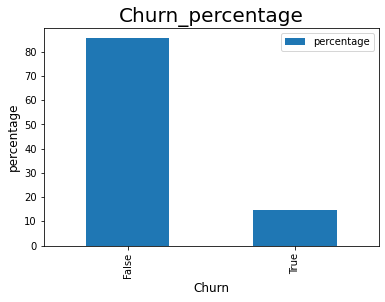

In [10]:
Total_Churn_percentage.plot(x='index',y='percentage',kind='bar')
plt.title('Churn_percentage',fontsize=20)
plt.xlabel('Churn',fontsize=12)
plt.ylabel('percentage',fontsize=12)

Text(0.5, 1.0, 'Churn_percentage')

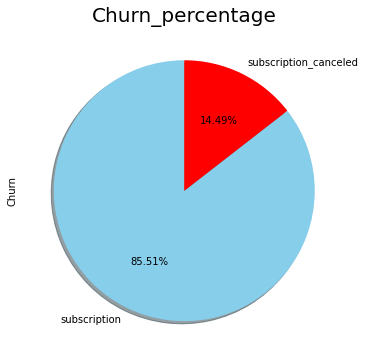

In [11]:
df['Churn'].value_counts().plot(kind='pie', figsize=(15,6),autopct="%1.2f%%",startangle=90,shadow='true', colors=['skyblue','red'],labels=['subscription','subscription_canceled'])
plt.title('Churn_percentage',fontsize=20)

###we see that 14.49% customer canceled there subscription

#Now find why those customer canceled there subscription

In [12]:
#for see the different type of call charge
df['day call charge']=(df['Total day charge']/df['Total day minutes']).round(2)
df['eve call charge']=(df['Total eve charge']/df['Total eve minutes']).round(2)
df['night call charge']=(df['Total night charge']/df['Total night minutes']).round(2)
df['intl call charge']=(df['Total intl charge']/df['Total intl minutes']).round(2)

In [13]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,day call charge,eve call charge,night call charge,intl call charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,0.17,0.09,0.04,0.27
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,False,0.17,0.09,0.05,0.27
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,False,0.17,0.08,0.05,0.27
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,False,0.17,0.08,0.04,0.27
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,False,0.17,0.09,0.04,0.27


##Find relation between 'International plan' and customer Churn 

In [14]:
Churn_percentage_1=df.groupby('International plan')['Churn'].value_counts(normalize=True)
Churn_percentage_1=(Churn_percentage_1.mul(100)).round(2).rename('percentage').reset_index()
Churn_percentage_1

,International plan,Churn,percentage
0,No,False,88.50
1,No,True,11.50
2,Yes,False,57.59
3,Yes,True,42.41


Text(0.5, 1.0, 'Churn percentage with respect to International plan')

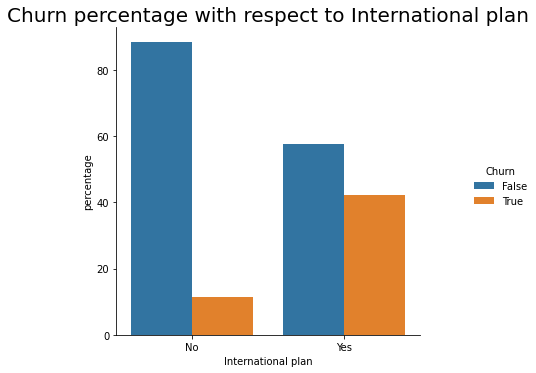

In [15]:
#see it graphically
sns.catplot(x='International plan',y='percentage',hue='Churn',kind='bar',data=Churn_percentage_1)
plt.title('Churn percentage with respect to International plan',fontsize=20)

###we easyly understand a big percentage of customer canceled the subscription who has International plan

###Now find what's the problem in International plan

In [16]:
df.groupby('International plan')['intl call charge'].mean().reset_index()

,International plan,intl call charge
0,No,0.27
1,Yes,0.27


###we find that customer who has international plan and the customer who has not International plan, in both cases intl call charge are same.

##Find relation between Customer Service calls and Churn customer

In [17]:
Churn_percentage_2=df.groupby('Customer service calls')['Churn'].value_counts(normalize=True)
Churn_percentage_2=(Churn_percentage_2.mul(100)).round(2).rename('percentage').reset_index()
Churn_percentage_2

,Customer service calls,Churn,percentage
0,0,False,86.80
1,0,True,13.20
2,1,False,89.67
3,1,True,10.33
4,2,False,88.54
5,2,True,11.46
6,3,False,89.74
7,3,True,10.26
8,4,False,54.22
9,4,True,45.78


Text(0.5, 1.0, 'Churn percentage w.r.t. Customer service calls')

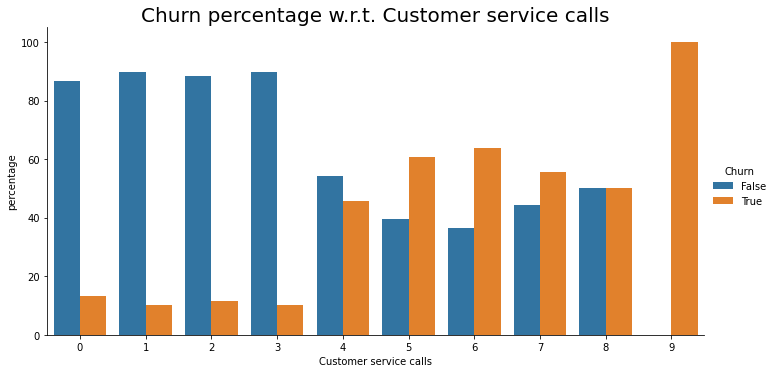

In [18]:
#see it graphically
sns.catplot(x='Customer service calls',y='percentage',hue='Churn', kind='bar',data=Churn_percentage_2,aspect=2)
plt.title('Churn percentage w.r.t. Customer service calls',fontsize=20)

We see that after 3 times customer service calls, there are high chance to customer canceled the subscription.

we conclude that for customer retention, company solve the customer problem before 4 times customer service calls

##For better understanging filter out those customer who canceled subscription

In [19]:
#Creat a subset of df
subscription_canceled=df[df['Churn']==True]

###subscription_canceled depend on voice mail plan

In [20]:
subscription_canceled['Voice mail plan'].value_counts().reset_index()

,index,Voice mail plan
0,No,403
1,Yes,80


In [21]:
Churn_percentage_3=subscription_canceled['Voice mail plan'].value_counts(normalize=True)
Churn_percentage_3=Churn_percentage_3.mul(100).round(2).rename('percentage').reset_index()
Churn_percentage_3

,index,percentage
0,No,83.44
1,Yes,16.56


Text(0, 0.5, 'percentage')

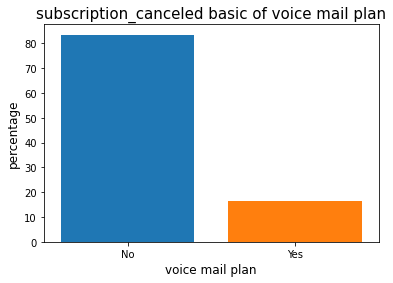

In [22]:
#see it graphically
sns.barplot(x='index',y='percentage',data=Churn_percentage_3,saturation=1)
plt.title('subscription_canceled basic of voice mail plan',fontsize=15)
plt.xlabel('voice mail plan',fontsize=12)
plt.ylabel('percentage',fontsize=12)

we see that 83.44% customer canceled there subscription because they have not voice mail plan.

##Subscription_canceled depend on International plan.

In [23]:
subscription_canceled['International plan'].value_counts()

No     346
Yes    137
Name: International plan, dtype: int64

In [24]:
Churn_percentage_4=subscription_canceled['International plan'].value_counts(normalize=True)
Churn_percentage_4=Churn_percentage_4.mul(100).round(2).rename('percentage').reset_index()
Churn_percentage_4

,index,percentage
0,No,71.64
1,Yes,28.36


Text(0.5, 0, 'International plan')

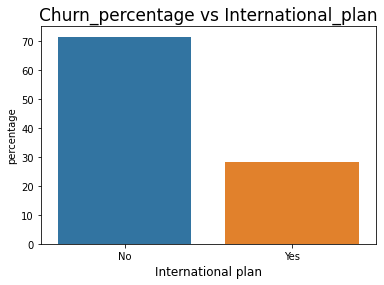

In [25]:
#see it graphically
sns.barplot(x='index',y='percentage',data=Churn_percentage_4)
plt.title('Churn_percentage vs International_plan',fontsize=17)
plt.xlabel('International plan',fontsize=12)

we see that 71.64% customer canceled there subscription because they have not International plan.